In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
df_train = pd.read_csv('aug_train.csv')
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [45]:
df_test = pd.read_csv('aug_test.csv')
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [46]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
df_train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [9]:
df_train['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [10]:
df_train['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [11]:
df_train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [13]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 3

In [48]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Deskripsi

In [49]:
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df_train["target"], 
                     values = df_train["enrollee_id"], 
                     title  = "Persentase target",
                     name   = "Target?",
                     marker = {'colors': ["Red","LightSkyBlue"]}),
              1, 1)
fig.show()

In [50]:
# Graphic Objects Plotly (Simple)
# Create subplot with 1 row and 2 columns
# in matplotlib, this is similar with plt.subplots(1, 2)
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df_train["education_level"], 
                     values = df_train["enrollee_id"], 
                     title  = "Persentase level pendidikan",
                     name   = "level?",
                     marker = {'colors': ["Red","LightSkyBlue"]}),
              1, 1)

fig.add_trace(go.Pie(labels = df_train["major_discipline"], 
                     values = df_train["enrollee_id"], 
                     title  = "Persentase disiplin ilmu",
                     name   = "major discipline??",
                     marker = {'colors': ["Pink","Green"]}),
              1, 2)

In [27]:
df_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

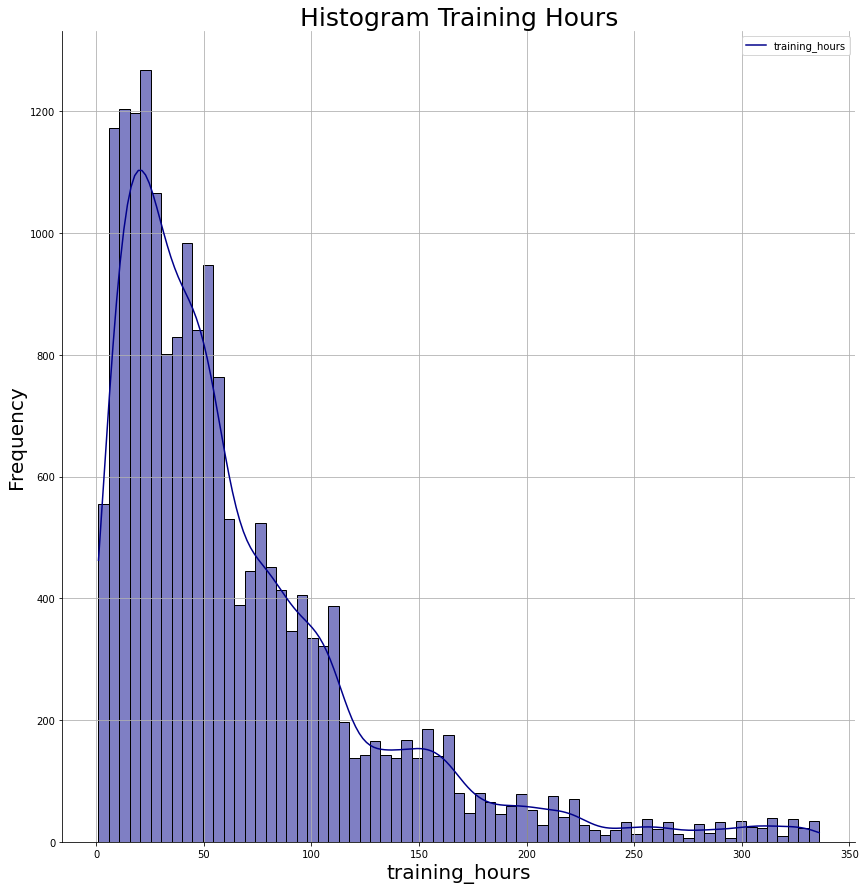

In [51]:
sns.displot(df_train['training_hours'], kde=True, color='darkblue', height=12)
plt.title('Histogram Training Hours', size = 25)
plt.xlabel('training_hours', size = 20)
plt.ylabel('Frequency', size = 20)
plt.grid(True)
plt.legend(['training_hours'])

In [52]:
dfg = df_train.groupby(['relevent_experience','gender']).mean().reset_index()
dfg

,relevent_experience,gender,enrollee_id,city_development_index,training_hours,target
0,Has relevent experience,Female,17078.487945,0.849387,67.771527,0.214696
1,Has relevent experience,Male,16826.380713,0.842836,65.652536,0.197690
2,Has relevent experience,Other,17983.336449,0.867215,63.560748,0.224299
3,No relevent experience,Female,18341.272480,0.833711,60.569482,0.378747
4,No relevent experience,Male,17981.010104,0.827519,64.215860,0.319657
5,No relevent experience,Other,17848.095238,0.865071,64.261905,0.309524


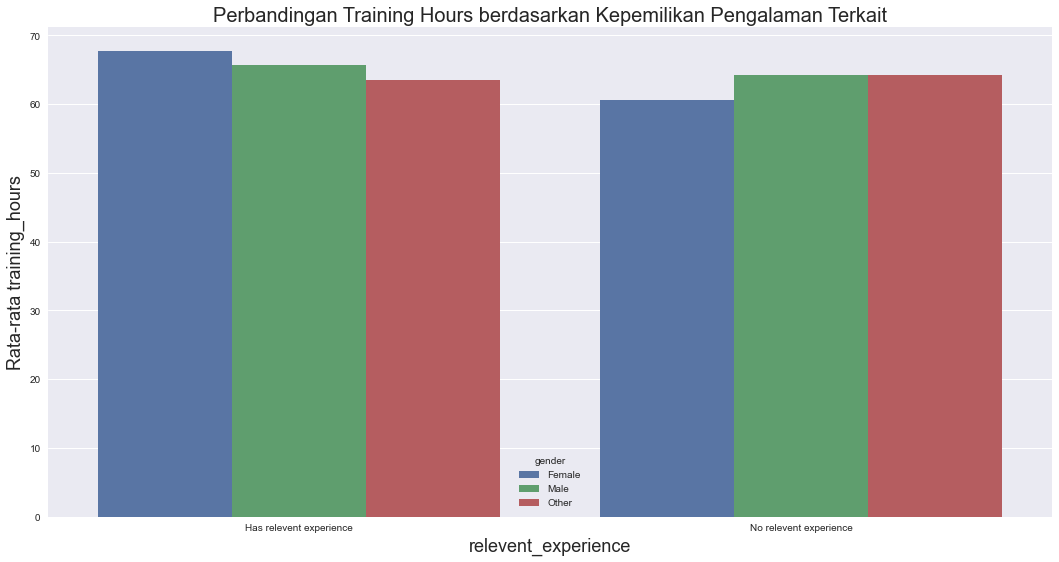

In [53]:
plt.style.use('seaborn')
plt.figure(figsize = (18,9))
# plt.bar(tables3["dept_name"], tables3["jumlah_pegawai"])
sns.barplot(x = 'relevent_experience',
            y = 'training_hours',
            hue = 'gender',
            data = dfg)
plt.xlabel('relevent_experience', size = 18)
plt.ylabel('Rata-rata training_hours', size = 18)
plt.title('Perbandingan Training Hours berdasarkan Kepemilikan Pengalaman Terkait', size = 20)
plt.show()

## 4

- Hipotesis :
    - H0 : mean target 0 = mean target 1
    - H1 : mean target 0 != mean target 1
- Alpha : 5%

In [54]:
from scipy.stats import shapiro

In [55]:
SStat, SPval = shapiro(df_train["training_hours"])

if SPval > 0.05 :
    # Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price merupakan distribusi Normal") 
else :
    # Tidak Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price bukan merupakan distribusi normal.\n\n")

SPvalnya adalah : 0.0, maka variable Price bukan merupakan distribusi normal.




C:\Users\Odie Husain\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



In [56]:
import seaborn as sns
from scipy.stats import mannwhitneyu

In [57]:
stat, pval = mannwhitneyu(df_train[df_train['target'] == 0]['training_hours'], df_train[df_train['target'] == 1]['training_hours'])

In [58]:
print('Hasil dan Keputusan')
if pval < 0.05 :
    print (f'Karena P-Value Sebesar {pval} < 5%, Maka kita punya cukup bukti untuk MENOLAK H0. Sehingga ada perbedaan training hours antara target')
else :
    print (f'Karena P-Value Sebesar {pval} > 5%, Maka kita TIDAK punya cukup bukti untuk MENOLAK H0. Sehingga TIDAK ADA perbedaan training hours antara targe')

Hasil dan Keputusan
Karena P-Value Sebesar 0.02528000266915821 < 5%, Maka kita punya cukup bukti untuk MENOLAK H0. Sehingga ada perbedaan training hours antara target


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Lihat presentase value yang null

In [60]:
for i in  df_train.columns:
    print (f"untuk variable {i}")
    jumlah_na = df_train[i].isna().sum()/len(df_train)*100
    print(f"Jumlah null valuenya adalah sebanyak {jumlah_na}%")
    print("\n")

untuk variable enrollee_id
Jumlah null valuenya adalah sebanyak 0.0%


untuk variable city
Jumlah null valuenya adalah sebanyak 0.0%


untuk variable city_development_index
Jumlah null valuenya adalah sebanyak 0.0%


untuk variable gender
Jumlah null valuenya adalah sebanyak 23.530639941538784%


untuk variable relevent_experience
Jumlah null valuenya adalah sebanyak 0.0%


untuk variable enrolled_university
Jumlah null valuenya adalah sebanyak 2.0148240943731075%


untuk variable education_level
Jumlah null valuenya adalah sebanyak 2.401085708320284%


untuk variable major_discipline
Jumlah null valuenya adalah sebanyak 14.68316108153252%


untuk variable experience
Jumlah null valuenya adalah sebanyak 0.33928385008873574%


untuk variable company_size
Jumlah null valuenya adalah sebanyak 30.994884643490973%


untuk variable company_type
Jumlah null valuenya adalah sebanyak 32.04927445453596%


untuk variable last_new_job
Jumlah null valuenya adalah sebanyak 2.207954901346696%


untuk

Karena melebihi 20% nilai null, maka variabel gender, company_size dan company_type tidak diikutkan dalam proses ini.

In [61]:
df_train2 = df_train.drop(['gender', 'company_size', 'company_type'], axis = 1)
df_train2.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,STEM,5,never,83,0.0
3,33241,city_115,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,never,52,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0


In [62]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.6+ MB


## Mulai pengisian null value

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
imp_cat = SimpleImputer(strategy='most_frequent')
df_train2[['enrolled_university','education_level', 'major_discipline']] = imp_cat.fit_transform(df_train2[['enrolled_university','education_level', 'major_discipline']])
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19093 non-null  object 
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.6+ MB


In [65]:
df_train2['experience'] = np.where(df_train2['experience'] == "<1", 0.5, df_train2['experience'])
df_train2['experience'] = np.where(df_train2['experience'] == ">20", 21, df_train2['experience'])
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19093 non-null  object 
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.6+ MB


In [66]:
df_train2 = df_train2.astype({"experience" : float})
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19093 non-null  float64
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.6+ MB


In [67]:
from scipy.stats import shapiro
SStat, SPval = shapiro(df_train2["experience"])

if SPval > 0.05 :
    # Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price merupakan distribusi Normal") 
else :
    # Tidak Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price bukan merupakan distribusi normal.\n\n")

SPvalnya adalah : 1.0, maka variable Price merupakan distribusi Normal


C:\Users\Odie Husain\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



In [68]:
imp_num = SimpleImputer(strategy='mean')
df_train2[['experience']] = imp_num.fit_transform(df_train2[['experience']])
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  float64
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.6+ MB


In [69]:
df_train2['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [70]:
import category_encoders as ce

In [71]:
ordinal_mapping = [
    {'col' : 'last_new_job',
    'mapping' :{None : 0, 'never' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, ">4" : 6}}
]

In [72]:
ordinal_encoder = ce.OrdinalEncoder(cols='last_new_job', mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(df_train2['last_new_job'])
dford

,last_new_job
0,2.0
1,6.0
2,1.0
3,1.0
4,5.0
...,...
19153,2.0
19154,5.0
19155,5.0
19156,3.0


In [73]:
df_train2[df_train2['last_new_job'].isna() == True]

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
58,13478,city_21,0.624,Has relevent experience,Full time course,Graduate,STEM,2.000000,NaN,32,1.0
64,9572,city_11,0.550,No relevent experience,Full time course,High School,STEM,3.000000,NaN,98,0.0
90,19128,city_61,0.913,No relevent experience,Full time course,Graduate,STEM,4.000000,NaN,140,0.0
135,23947,city_103,0.920,No relevent experience,no_enrollment,Phd,STEM,10.113811,NaN,70,0.0
180,27708,city_94,0.698,No relevent experience,Full time course,Graduate,STEM,5.000000,NaN,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18944,2678,city_104,0.924,No relevent experience,no_enrollment,Phd,STEM,21.000000,NaN,27,0.0
19043,17966,city_114,0.926,No relevent experience,Full time course,High School,STEM,3.000000,NaN,20,0.0
19106,18131,city_100,0.887,No relevent experience,Full time course,Masters,STEM,6.000000,NaN,8,0.0
19113,11622,city_19,0.682,No relevent experience,Full time course,Graduate,STEM,6.000000,NaN,53,0.0


In [74]:
dford.iloc[[58,64,135,180]]

,last_new_job
58,-1.0
64,-1.0
135,-1.0
180,-1.0


In [75]:
df_encoded = df_train2.drop('last_new_job', axis = 1)
df_encoded = pd.concat([df_encoded, dford], axis=1)
df_encoded

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,training_hours,target,last_new_job
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21.0,36,1.0,2.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15.0,47,0.0,6.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,STEM,5.0,83,0.0,1.0
3,33241,city_115,0.789,No relevent experience,no_enrollment,Graduate,Business Degree,0.5,52,1.0,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,STEM,21.0,8,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14.0,42,1.0,2.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14.0,52,1.0,5.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21.0,44,0.0,5.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,STEM,0.5,97,0.0,3.0


In [76]:
df_encoded[df_encoded["last_new_job"] == -1]

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,training_hours,target,last_new_job
58,13478,city_21,0.624,Has relevent experience,Full time course,Graduate,STEM,2.000000,32,1.0,-1.0
64,9572,city_11,0.550,No relevent experience,Full time course,High School,STEM,3.000000,98,0.0,-1.0
90,19128,city_61,0.913,No relevent experience,Full time course,Graduate,STEM,4.000000,140,0.0,-1.0
135,23947,city_103,0.920,No relevent experience,no_enrollment,Phd,STEM,10.113811,70,0.0,-1.0
180,27708,city_94,0.698,No relevent experience,Full time course,Graduate,STEM,5.000000,24,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
18944,2678,city_104,0.924,No relevent experience,no_enrollment,Phd,STEM,21.000000,27,0.0,-1.0
19043,17966,city_114,0.926,No relevent experience,Full time course,High School,STEM,3.000000,20,0.0,-1.0
19106,18131,city_100,0.887,No relevent experience,Full time course,Masters,STEM,6.000000,8,0.0,-1.0
19113,11622,city_19,0.682,No relevent experience,Full time course,Graduate,STEM,6.000000,53,0.0,-1.0


In [77]:
df_encoded["last_new_job"].replace(-1,np.nan, inplace = True)

In [78]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  float64
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
 10  last_new_job            18735 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.6+ MB


In [79]:
from scipy.stats import shapiro
SStat, SPval = shapiro(df_encoded["last_new_job"])

if SPval > 0.05 :
    # Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price merupakan distribusi Normal") 
else :
    # Tidak Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price bukan merupakan distribusi normal.\n\n")

SPvalnya adalah : 1.0, maka variable Price merupakan distribusi Normal


C:\Users\Odie Husain\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



In [80]:
imp_num = SimpleImputer(strategy='mean')
df_encoded[['last_new_job']] = imp_num.fit_transform(df_encoded[['last_new_job']])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  float64
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
 10  last_new_job            19158 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.6+ MB


In [81]:
df_encoded["education_level"].value_counts()

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [82]:
ordinal_mapping = [
    {'col' : 'education_level',
    'mapping' :{None : 0, 'Primary School' : 1, 'High School' : 2, 'Graduate' : 3, 'Masters' : 4, "Phd" : 5}}
]

In [83]:
ordinal_encoder = ce.OrdinalEncoder(cols='education_level', mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(df_train2['education_level'])
dford

,education_level
0,3
1,3
2,3
3,3
4,4
...,...
19153,3
19154,3
19155,3
19156,2


In [84]:
df_encoded = df_encoded.drop('education_level', axis = 1)
df_encoded = pd.concat([df_encoded, dford], axis=1)
df_encoded

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,major_discipline,experience,training_hours,target,last_new_job,education_level
0,8949,city_103,0.920,Has relevent experience,no_enrollment,STEM,21.0,36,1.0,2.0,3
1,29725,city_40,0.776,No relevent experience,no_enrollment,STEM,15.0,47,0.0,6.0,3
2,11561,city_21,0.624,No relevent experience,Full time course,STEM,5.0,83,0.0,1.0,3
3,33241,city_115,0.789,No relevent experience,no_enrollment,Business Degree,0.5,52,1.0,1.0,3
4,666,city_162,0.767,Has relevent experience,no_enrollment,STEM,21.0,8,0.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Humanities,14.0,42,1.0,2.0,3
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,STEM,14.0,52,1.0,5.0,3
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,STEM,21.0,44,0.0,5.0,3
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,STEM,0.5,97,0.0,3.0,2


In [85]:
df_encoded["major_discipline"].value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [86]:
encoder= ce.BinaryEncoder(cols=['major_discipline'],return_df=True)

df_encoded = encoder.fit_transform(df_encoded) 
df_encoded

C:\Users\Odie Husain\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,experience,training_hours,target,last_new_job,education_level
0,8949,city_103,0.920,Has relevent experience,no_enrollment,0,0,0,1,21.0,36,1.0,2.0,3
1,29725,city_40,0.776,No relevent experience,no_enrollment,0,0,0,1,15.0,47,0.0,6.0,3
2,11561,city_21,0.624,No relevent experience,Full time course,0,0,0,1,5.0,83,0.0,1.0,3
3,33241,city_115,0.789,No relevent experience,no_enrollment,0,0,1,0,0.5,52,1.0,1.0,3
4,666,city_162,0.767,Has relevent experience,no_enrollment,0,0,0,1,21.0,8,0.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,0,1,0,0,14.0,42,1.0,2.0,3
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,0,0,0,1,14.0,52,1.0,5.0,3
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,0,0,0,1,21.0,44,0.0,5.0,3
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,0,0,0,1,0.5,97,0.0,3.0,2


In [87]:
df_encoded = pd.get_dummies(df_encoded, drop_first = True,  columns=['relevent_experience', 'enrolled_university'])
df_encoded

,enrollee_id,city,city_development_index,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,experience,training_hours,target,last_new_job,education_level,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment
0,8949,city_103,0.920,0,0,0,1,21.0,36,1.0,2.0,3,0,0,1
1,29725,city_40,0.776,0,0,0,1,15.0,47,0.0,6.0,3,1,0,1
2,11561,city_21,0.624,0,0,0,1,5.0,83,0.0,1.0,3,1,0,0
3,33241,city_115,0.789,0,0,1,0,0.5,52,1.0,1.0,3,1,0,1
4,666,city_162,0.767,0,0,0,1,21.0,8,0.0,5.0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,0,1,0,0,14.0,42,1.0,2.0,3,1,0,1
19154,31398,city_103,0.920,0,0,0,1,14.0,52,1.0,5.0,3,0,0,1
19155,24576,city_103,0.920,0,0,0,1,21.0,44,0.0,5.0,3,0,0,1
19156,5756,city_65,0.802,0,0,0,1,0.5,97,0.0,3.0,2,0,0,1


In [88]:
df_encoded.columns

Index(['enrollee_id', 'city', 'city_development_index', 'major_discipline_0',
       'major_discipline_1', 'major_discipline_2', 'major_discipline_3',
       'experience', 'training_hours', 'target', 'last_new_job',
       'education_level', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment'],
      dtype='object')

In [89]:
X = df_encoded[['city_development_index', 'major_discipline_0',
       'major_discipline_1', 'major_discipline_2', 'major_discipline_3',
       'experience', 'training_hours', 'last_new_job',
       'education_level', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment']]
y = df_encoded['target']

## Pembagian test-train data lalu buat model

In [90]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, train_size = 0.8, random_state = 10)

In [91]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

## KNN

In [92]:
scaler = RobustScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [93]:
# Find Best K
k = range(3,50,2) #(1,3,5,7,....,49)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain_scaled, Ytrain)
    
    # y_pred_train = knn.predict(X_train_Scaled)
    # training_accuracy.append(accuracy_score(Ytrain, y_pred_train))
    
    y_pred_test = knn.predict(Xtest_scaled)
    acc_score = accuracy_score(Ytest,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

print('Best Accuracy Score', round(score,4), 'Best K-Score', best_k)

Best Accuracy Score 0.7758 Best K-Score 45


In [94]:
knn = KNeighborsClassifier(n_neighbors = 45)
knn.fit(Xtrain_scaled, Ytrain)
ypredict_knn = knn.predict(Xtest_scaled)
ypredict_knn

array([0., 0., 1., ..., 0., 0., 0.])

In [103]:
print(classification_report(Ytest, ypredict_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      2903
         1.0       0.56      0.35      0.43       929

    accuracy                           0.78      3832
   macro avg       0.69      0.63      0.65      3832
weighted avg       0.75      0.78      0.76      3832



## Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
msl = range(1,100)
testing_accuracies = []
training_accuracies = []
score = 0

for i in msl:
  tree = DecisionTreeClassifier(
      criterion = 'entropy',
      max_depth = i
      )
  tree.fit(Xtrain_scaled,Ytrain)

  y_predict_train = tree.predict(Xtrain_scaled)
  training_accuracies.append(accuracy_score(Ytrain,y_predict_train))

  y_predict_test = tree.predict(Xtest_scaled)
  acc_score = accuracy_score(Ytest,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

print('Best Accuracy Score', round(score,4), 'Best max_depth', best_depth)

Best Accuracy Score 0.7824 Best max_depth 5


In [98]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(Xtrain_scaled, Ytrain)
ypredict_tree = tree.predict(Xtest_scaled)
ypredict_tree

array([0., 0., 1., ..., 0., 0., 0.])

In [99]:
print(classification_report(Ytest, ypredict_tree))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      2903
         1.0       0.57      0.40      0.47       929

    accuracy                           0.78      3832
   macro avg       0.70      0.65      0.67      3832
weighted avg       0.76      0.78      0.77      3832



## Ridge

In [100]:
from sklearn.linear_model import RidgeClassifier

In [101]:
ridge = RidgeClassifier()
ridge.fit(Xtrain_scaled, Ytrain)
ypredict_ridge = ridge.predict(Xtest_scaled)
ypredict_ridge

array([0., 0., 0., ..., 0., 0., 0.])

In [102]:
print(classification_report(Ytest, ypredict_tree))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      2903
         1.0       0.57      0.40      0.47       929

    accuracy                           0.78      3832
   macro avg       0.70      0.65      0.67      3832
weighted avg       0.76      0.78      0.77      3832



## Dipilih metode decision-tree dengan max-depth 5

## Aug Test

In [12]:
df_test = pd.read_csv("aug_test.csv")
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [14]:
df_test = df_test.drop(['gender', 'company_size', 'company_type'], axis = 1)
df_test.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours
0,32403,city_41,0.827,Has relevent experience,Full time course,Graduate,STEM,9,1,21
1,9858,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,5,1,98
2,31806,city_21,0.624,No relevent experience,no_enrollment,High School,NaN,0.5,never,15
3,27385,city_13,0.827,Has relevent experience,no_enrollment,Masters,STEM,11,1,39
4,27724,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,>4,72


In [16]:
imp_cat = SimpleImputer(strategy='most_frequent')
df_test[['enrolled_university','education_level', 'major_discipline']] = imp_cat.fit_transform(df_test[['enrolled_university','education_level', 'major_discipline']])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2129 non-null   object 
 5   education_level         2129 non-null   object 
 6   major_discipline        2129 non-null   object 
 7   experience              2124 non-null   object 
 8   last_new_job            2089 non-null   object 
 9   training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 166.5+ KB


In [17]:
df_test['experience'] = np.where(df_test['experience'] == "<1", 0.5, df_test['experience'])
df_test['experience'] = np.where(df_test['experience'] == ">20", 21, df_test['experience'])
df_test['experience'].value_counts()

21     383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
0.5     74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

In [18]:
df_test = df_test.astype({"experience" : float})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2129 non-null   object 
 5   education_level         2129 non-null   object 
 6   major_discipline        2129 non-null   object 
 7   experience              2124 non-null   float64
 8   last_new_job            2089 non-null   object 
 9   training_hours          2129 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 166.5+ KB


In [19]:
from scipy.stats import shapiro
SStat, SPval = shapiro(df_test["experience"])

if SPval > 0.05 :
    # Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price merupakan distribusi Normal") 
else :
    # Tidak Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price bukan merupakan distribusi normal.\n\n")

SPvalnya adalah : 1.0, maka variable Price merupakan distribusi Normal


In [20]:
imp_num = SimpleImputer(strategy='mean')
df_test[['experience']] = imp_num.fit_transform(df_test[['experience']])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2129 non-null   object 
 5   education_level         2129 non-null   object 
 6   major_discipline        2129 non-null   object 
 7   experience              2129 non-null   float64
 8   last_new_job            2089 non-null   object 
 9   training_hours          2129 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 166.5+ KB


In [21]:
df_test['last_new_job'].value_counts()

1        884
>4       353
2        342
never    258
3        133
4        119
Name: last_new_job, dtype: int64

In [22]:
ordinal_mapping = [
    {'col' : 'last_new_job',
    'mapping' :{None : 0, 'never' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, ">4" : 6}}
]

In [23]:
ordinal_encoder = ce.OrdinalEncoder(cols='last_new_job', mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(df_test['last_new_job'])
dford

,last_new_job
0,2.0
1,2.0
2,1.0
3,2.0
4,6.0
...,...
2124,5.0
2125,3.0
2126,1.0
2127,2.0


In [24]:
df_test2 = df_test.drop('last_new_job', axis = 1)
df_test2 = pd.concat([df_test2, dford], axis=1)
df_test2.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,training_hours,last_new_job
0,32403,city_41,0.827,Has relevent experience,Full time course,Graduate,STEM,9.0,21,2.0
1,9858,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,5.0,98,2.0
2,31806,city_21,0.624,No relevent experience,no_enrollment,High School,STEM,0.5,15,1.0
3,27385,city_13,0.827,Has relevent experience,no_enrollment,Masters,STEM,11.0,39,2.0
4,27724,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21.0,72,6.0


In [26]:
df_test2[df_test2["last_new_job"] == -1].head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,training_hours,last_new_job
29,19437,city_21,0.624,Has relevent experience,no_enrollment,Graduate,STEM,3.000000,105,-1.0
53,4742,city_149,0.689,No relevent experience,no_enrollment,Graduate,STEM,2.000000,114,-1.0
125,4417,city_103,0.920,No relevent experience,no_enrollment,Graduate,STEM,10.122411,99,-1.0
129,24230,city_21,0.624,Has relevent experience,Full time course,Masters,No Major,0.500000,17,-1.0
149,20948,city_44,0.725,Has relevent experience,no_enrollment,Masters,STEM,5.000000,42,-1.0


In [27]:
df_test2["last_new_job"].replace(-1,np.nan, inplace = True)

In [28]:
from scipy.stats import shapiro
SStat, SPval = shapiro(df_test2["last_new_job"])

if SPval > 0.05 :
    # Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price merupakan distribusi Normal") 
else :
    # Tidak Distribusi Normal
    print (f"SPvalnya adalah : {SPval}, maka variable Price bukan merupakan distribusi normal.\n\n")

SPvalnya adalah : 1.0, maka variable Price merupakan distribusi Normal


In [29]:
imp_num = SimpleImputer(strategy='mean')
df_test2[['last_new_job']] = imp_num.fit_transform(df_test2[['last_new_job']])
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2129 non-null   object 
 5   education_level         2129 non-null   object 
 6   major_discipline        2129 non-null   object 
 7   experience              2129 non-null   float64
 8   training_hours          2129 non-null   int64  
 9   last_new_job            2129 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 166.5+ KB


In [31]:
df_test2["education_level"].value_counts()

Graduate          1321
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [32]:
ordinal_mapping = [
    {'col' : 'education_level',
    'mapping' :{None : 0, 'Primary School' : 1, 'High School' : 2, 'Graduate' : 3, 'Masters' : 4, "Phd" : 5}}
]

In [33]:
ordinal_encoder = ce.OrdinalEncoder(cols='education_level', mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(df_test2['education_level'])
dford

,education_level
0,3
1,3
2,2
3,4
4,3
...,...
2124,3
2125,4
2126,1
2127,2


In [34]:
df_te = df_test2.drop('education_level', axis = 1)
df_te = pd.concat([df_te, dford], axis=1)
df_te

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,major_discipline,experience,training_hours,last_new_job,education_level
0,32403,city_41,0.827,Has relevent experience,Full time course,STEM,9.0,21,2.0,3
1,9858,city_103,0.920,Has relevent experience,no_enrollment,STEM,5.0,98,2.0,3
2,31806,city_21,0.624,No relevent experience,no_enrollment,STEM,0.5,15,1.0,2
3,27385,city_13,0.827,Has relevent experience,no_enrollment,STEM,11.0,39,2.0,4
4,27724,city_103,0.920,Has relevent experience,no_enrollment,STEM,21.0,72,6.0,3
...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,No relevent experience,no_enrollment,Humanities,16.0,15,5.0,3
2125,195,city_136,0.897,Has relevent experience,no_enrollment,STEM,18.0,30,3.0,4
2126,31762,city_100,0.887,No relevent experience,no_enrollment,STEM,3.0,18,1.0,1
2127,7873,city_102,0.804,Has relevent experience,Full time course,STEM,7.0,84,2.0,2


In [36]:
df_te["major_discipline"].value_counts()

STEM               1933
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [37]:
encoder= ce.BinaryEncoder(cols=['major_discipline'],return_df=True)

df_te = encoder.fit_transform(df_te) 
df_te

C:\Users\Odie Husain\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,experience,training_hours,last_new_job,education_level
0,32403,city_41,0.827,Has relevent experience,Full time course,0,0,0,1,9.0,21,2.0,3
1,9858,city_103,0.920,Has relevent experience,no_enrollment,0,0,0,1,5.0,98,2.0,3
2,31806,city_21,0.624,No relevent experience,no_enrollment,0,0,0,1,0.5,15,1.0,2
3,27385,city_13,0.827,Has relevent experience,no_enrollment,0,0,0,1,11.0,39,2.0,4
4,27724,city_103,0.920,Has relevent experience,no_enrollment,0,0,0,1,21.0,72,6.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,No relevent experience,no_enrollment,0,1,0,1,16.0,15,5.0,3
2125,195,city_136,0.897,Has relevent experience,no_enrollment,0,0,0,1,18.0,30,3.0,4
2126,31762,city_100,0.887,No relevent experience,no_enrollment,0,0,0,1,3.0,18,1.0,1
2127,7873,city_102,0.804,Has relevent experience,Full time course,0,0,0,1,7.0,84,2.0,2


In [38]:
df_te = pd.get_dummies(df_te, drop_first = True,  columns=['relevent_experience', 'enrolled_university'])
df_te

,enrollee_id,city,city_development_index,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,experience,training_hours,last_new_job,education_level,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment
0,32403,city_41,0.827,0,0,0,1,9.0,21,2.0,3,0,0,0
1,9858,city_103,0.920,0,0,0,1,5.0,98,2.0,3,0,0,1
2,31806,city_21,0.624,0,0,0,1,0.5,15,1.0,2,1,0,1
3,27385,city_13,0.827,0,0,0,1,11.0,39,2.0,4,0,0,1
4,27724,city_103,0.920,0,0,0,1,21.0,72,6.0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,0,1,0,1,16.0,15,5.0,3,1,0,1
2125,195,city_136,0.897,0,0,0,1,18.0,30,3.0,4,0,0,1
2126,31762,city_100,0.887,0,0,0,1,3.0,18,1.0,1,1,0,1
2127,7873,city_102,0.804,0,0,0,1,7.0,84,2.0,2,0,0,0


In [40]:
X2 = df_te[['city_development_index', 'major_discipline_0',
       'major_discipline_1', 'major_discipline_2', 'major_discipline_3',
       'experience', 'training_hours', 'last_new_job',
       'education_level', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment']]

In [105]:
scaler = RobustScaler()
scaler.fit(Xtrain)
X2_scaled = scaler.transform(X2)

In [107]:
ypredict2 = tree.predict(X2_scaled)
ypredict2

array([0., 0., 1., ..., 0., 0., 0.])

In [112]:
output = pd.DataFrame(columns=['target'], data=ypredict2)
output

,target
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2124,0.0
2125,0.0
2126,0.0
2127,0.0


## Output Prediksi

In [118]:
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = output["target"], 
                     values = output.index, 
                     title  = "Persentase prediksi target",
                     name   = "Target?",
                     marker = {'colors': ["Red","LightSkyBlue"]}),
              1, 1)
fig.show()

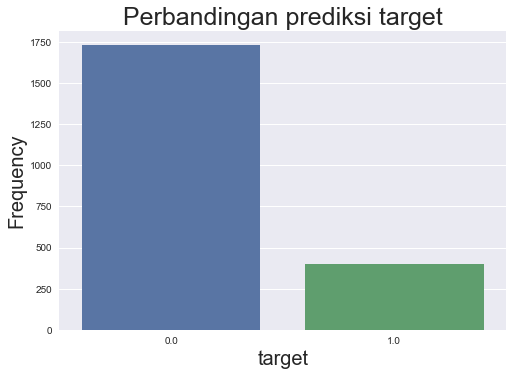

In [117]:
ax = sns.countplot(x="target", data=output)
plt.title('Perbandingan prediksi target', size = 25)
plt.xlabel('target', size = 20)
plt.ylabel('Frequency', size = 20)
plt.show()